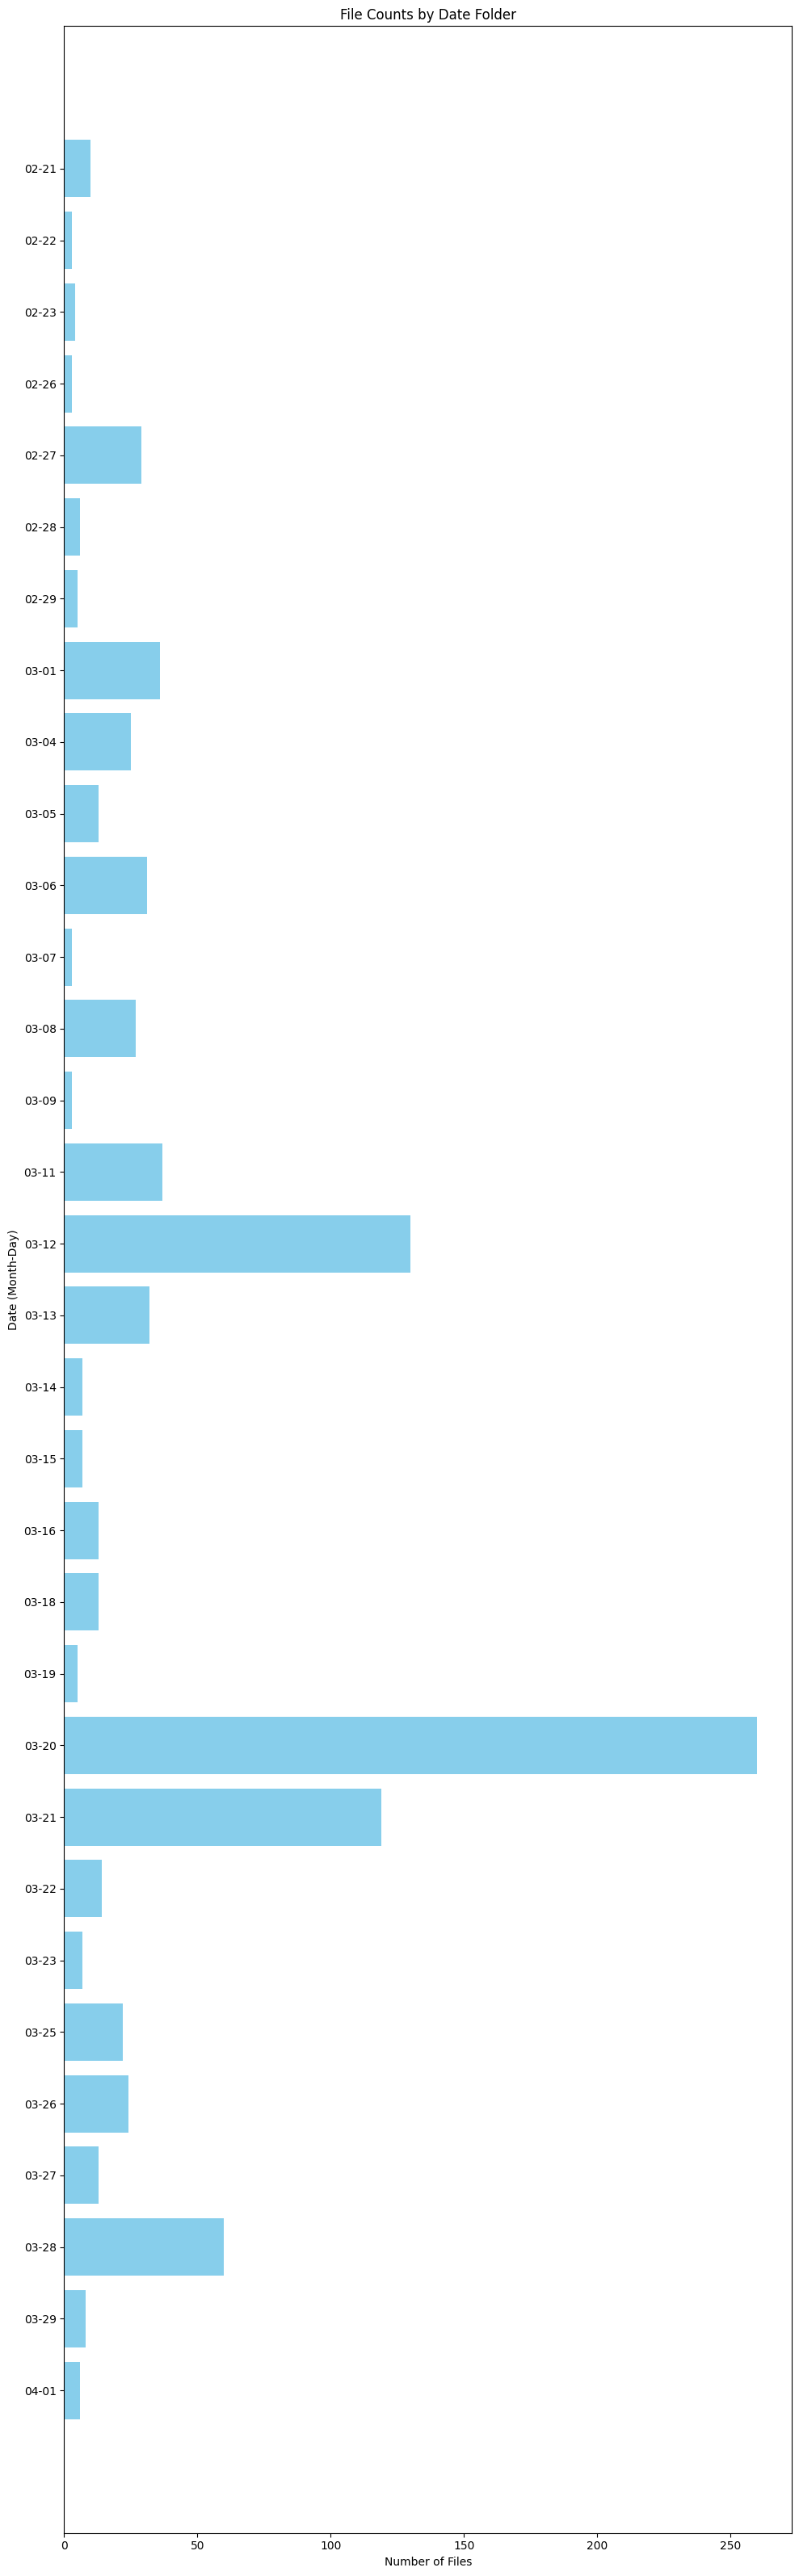

In [1]:
import os
from datetime import datetime
import matplotlib.pyplot as plt
# 文件结构
# main_folder/
# ├── person1/
# │   ├── date1/
# │   │   ├── file1
# │   │   └── file2
# │   └── date2/
# │       ├── file1
# │       └── file2
# └── person2/
#     ├── date1/
#     │   ├── file1
#     │   └── file2
#     └── date2/
#         ├── file1
#         └── file2
# 设置你的主文件夹路径

main_folder_path = '../outputs/'

# 初始化一个字典来存储每个日期文件夹的文件数量
date_folder_counts = {}

# 遍历主文件夹下的所有子文件夹（即人名文件夹）
for person_folder in os.listdir(main_folder_path):
    person_folder_path = os.path.join(main_folder_path, person_folder)
    if os.path.isdir(person_folder_path):
        # 遍历每个人的文件夹下的所有日期文件夹
        for date_folder in os.listdir(person_folder_path):
            date_folder_path = os.path.join(person_folder_path, date_folder)
            if os.path.isdir(date_folder_path):
                # 计算每个日期文件夹下的文件数量
                file_count = len(os.listdir(date_folder_path))
                # 将结果存储在字典中，使用日期字符串作为键
                date_folder_counts[date_folder] = file_count

# 将日期字符串转换为datetime对象并排序
sorted_dates = sorted(date_folder_counts.keys(), key=lambda x: datetime.strptime(x, '%Y-%m-%d'), reverse=True)

# 提取月份和日期作为条形图的标签
labels = [date.split('-')[1:] for date in sorted_dates]
labels = ['-'.join(label) for label in labels]

# 使用matplotlib生成条形图
plt.figure(figsize=(10, len(sorted_dates)))  # 调整图表大小以适应日期数量
plt.barh(labels, [date_folder_counts[date] for date in sorted_dates], color='skyblue')
plt.xlabel('Number of Files')
plt.ylabel('Date (Month-Day)')
plt.title('File Counts by Date Folder')
plt.tight_layout()  # 自动调整布局以防止标签被裁剪
plt.show()